Loading and Displaying Well Log Data from LAS Files with Python
https://andymcdonaldgeo.medium.com/loading-and-displaying-well-log-data-b9568efd1d8
    
Loading Multiple Well Log LAS Files Using Python
https://towardsdatascience.com/loading-multiple-well-log-las-files-using-python-39ac35de99dd
    
    

# Definitions

- **Depth**: Depth refers to the vertical position or distance below the surface at which a particular measurement or observation is taken. It provides the spatial information along the wellbore or stratigraphic column.

- **Caliper**: Caliper is a measurement of the diameter or width of a borehole or wellbore. It helps assess the size and shape of the wellbore, which is important for understanding drilling operations, casing placement, and well integrity.

- **Density Correction**: Density correction is the adjustment made to measurements, such as resistivity or porosity, to account for the density of the drilling fluid or mud in the wellbore. It ensures that the recorded values accurately reflect the properties of the surrounding rock formations.

- **Delta-T**: Delta-T, also known as travel time or transit time, refers to the time it takes for a wave or signal to travel a known distance in the subsurface. In stratigraphy, delta-T is often measured using sonic or acoustic tools and can be used to estimate porosity and rock properties.

- **Gamma Ray**: Gamma ray measures the natural gamma radiation emitted by the rocks. It provides information about the lithology, identifying different formations and lithological changes within the wellbore. Gamma ray logs are commonly used for correlation and identification of specific rock units.

- **Deep Induction Standard Processed Resistivity**: Deep induction standard processed resistivity is a measurement of electrical resistivity in the subsurface. It helps determine the conductivity or resistivity of the formation and provides insights into lithology, fluid content, and rock properties.

- **Medium Induction Standard Processed Resistivity**: Medium induction standard processed resistivity is another measurement of electrical resistivity in the subsurface. It provides additional information on the conductivity or resistivity of the formation, which aids in lithology and fluid analysis.

- **Neutron Porosity**: Neutron porosity is a measurement of the hydrogen content or porosity of the rock formation. Neutrons are scattered by hydrogen atoms, and by analyzing the response of neutrons, neutron porosity logs estimate the porosity and fluid content in the subsurface.

- **Bulk Density**: Bulk density refers to the density of the rock formation. It is often measured using density logs or derived from other measurements such as neutron porosity and resistivity. Bulk density is essential for estimating rock properties, porosity, and fluid content.

- **Photo-Electric Factor**: Photo-electric factor (PEF) is a measurement of the electron density of the rock formation. It is obtained by measuring the absorption of gamma rays with different energies. PEF is useful in identifying lithology and assessing the presence of clay minerals.

- **SFL Resistivity**: SFL resistivity, also known as shallow focused log resistivity, is a measurement of resistivity near the wellbore. It provides information about the formation resistivity, fluid content, and rock properties near the borehole.

- **Spontaneous Potential**: Spontaneous potential (SP) is a measurement of natural electrical potential between the wellbore and the surrounding formation. SP logs are used to identify permeable zones, determine formation boundaries, and detect fluid movement within the rock.

# Recommendations for variables seen in conjuntion with oil prescense

- **Gamma Ray**: High gamma ray values can indicate the presence of organic-rich shale or source rocks, which are potential reservoirs for oil and gas. Elevated gamma ray values often suggest higher organic content.

- **Resistivity**: Hydrocarbon-bearing formations typically exhibit lower resistivity compared to water-bearing formations. Low resistivity values can be indicative of the presence of oil or gas. However, it is important to consider other factors such as lithology and fluid properties in the interpretation of resistivity logs.

- **Neutron Porosity**: Oil-bearing formations may exhibit relatively lower neutron porosity compared to water-bearing formations. Oil has a lower hydrogen content compared to water, and neutron porosity logs can show a decrease in porosity where oil is present.

- **Density**: Density logs can provide information about the bulk density of the formation. Oil-bearing formations may exhibit lower density compared to water-bearing formations due to the lower density of oil.

- **Sonic Velocity**: The velocity of sound waves in the subsurface, as measured by sonic logs, can vary depending on the fluids present. Oil typically exhibits lower sonic velocities compared to water, so a decrease in sonic velocity can suggest the presence of oil.

- **Fluid Pressure**: Abnormal fluid pressure, such as overpressured zones, can be an indicator of hydrocarbon presence. Significant deviations from normal pressure gradients may suggest the presence of oil or gas accumulations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import lasio

In [4]:
las = lasio.read("../data/LJ-1005.LAS")

In [5]:
well = las.df()

In [6]:
well.head()

,CALI,DRHO,DT,GR,ILD,ILM,NPHI,PEF,RHOB,SFLA,SP
DEPT,,,,,,,,,,,
2199.9961,6.0,0.058,50.0,0.0,2.47,2.91,18.678,2.925,2.492,2.16,-0.97
2199.8438,6.0,0.059,50.0,0.0,2.47,2.91,18.843,2.886,2.491,2.16,-0.99
2199.6914,6.0,0.059,50.0,0.0,2.47,2.91,19.092,2.824,2.490,2.16,-0.92
2199.5391,6.0,0.059,50.0,0.0,2.47,2.91,19.127,2.808,2.490,2.16,-0.85
2199.3867,6.0,0.063,50.0,0.0,2.47,2.91,19.030,2.781,2.494,2.16,-0.75


In [7]:
df = well.reset_index()

In [8]:
df = df.sort_values("DEPT")

In [9]:
from datetime import datetime, timedelta, date

In [10]:
df["date"] = [date(2023, 1, 1) if x == 400.000 else datetime(2022,12,30,0,0,0) for x in df["DEPT"] ]

In [11]:
df["distance_diff"] = round(df["DEPT"].diff(), 3)

In [12]:
df['distance_diff'] = np.where(df['DEPT'] == 400,0, df["distance_diff"] )

In [13]:
df.head()

,DEPT,CALI,DRHO,DT,GR,ILD,ILM,NPHI,PEF,RHOB,SFLA,SP,date,distance_diff
11811,400.0000,9.04,NaN,111.28,45.12,14.10,0.10,NaN,NaN,NaN,0.10,40.94,2023-01-01,0.000
11810,400.1524,9.25,NaN,117.94,48.46,11.94,0.10,NaN,NaN,NaN,2.78,28.06,2022-12-30 00:00:00,0.152
11809,400.3048,9.37,NaN,119.72,50.59,10.28,0.10,NaN,NaN,NaN,0.25,20.90,2022-12-30 00:00:00,0.152
11808,400.4572,9.56,NaN,118.41,54.67,5.16,10.70,NaN,NaN,NaN,1.18,8.56,2022-12-30 00:00:00,0.152
11807,400.6096,9.61,NaN,116.07,56.10,3.87,6.18,NaN,NaN,NaN,2.26,4.30,2022-12-30 00:00:00,0.152


In [14]:
last_date = df.iloc[0]["date"]
new_dates = []

for i, x in df.iterrows():
    #sec = x["distance_diff"]*10000
    last_date += timedelta(days=1)
    new_dates.append(last_date.strftime("%Y-%m-%d %X"))
    

In [15]:
df["dates_sec"] = new_dates

In [16]:
df["distance_diff"].value_counts()

distance_diff
0.152    9689
0.153    2122
0.000       1
Name: count, dtype: int64

In [17]:
df["dates_sec"]

11811    2023-01-02 00:00:00
11810    2023-01-03 00:00:00
11809    2023-01-04 00:00:00
11808    2023-01-05 00:00:00
11807    2023-01-06 00:00:00
                ...         
4        2055-05-01 00:00:00
3        2055-05-02 00:00:00
2        2055-05-03 00:00:00
1        2055-05-04 00:00:00
0        2055-05-05 00:00:00
Name: dates_sec, Length: 11812, dtype: object

In [18]:
from sklearn.decomposition import PCA

In [19]:
df.columns

Index(['DEPT', 'CALI', 'DRHO', 'DT', 'GR', 'ILD', 'ILM', 'NPHI', 'PEF', 'RHOB',
       'SFLA', 'SP', 'date', 'distance_diff', 'dates_sec'],
      dtype='object')

In [20]:
pca = PCA(n_components=2)
X = df[['DEPT', 'CALI', 'DRHO', 'DT', 'GR', 'ILD', 'ILM', 'NPHI', 'PEF', 'RHOB',
       'SFLA', 'SP']].fillna(0)
pca.fit(X)

PCA(n_components=2)

In [21]:
pca_features = pca.fit_transform(X)

In [22]:
pca_features

array([[ 901.29837041,    7.1872036 ],
       [ 901.07233423,    9.71610781],
       [ 900.90079936,    7.10561816],
       ...,
       [-899.13952468,  -21.55931032],
       [-899.29056074,  -21.56154596],
       [-899.44108811,  -21.56377613]])

In [23]:
pca_df = pd.DataFrame(pca_features, columns=["x", "y"])
pca_df.head()

,x,y
0,901.298370,7.187204
1,901.072334,9.716108
2,900.900799,7.105618
3,900.505547,8.003365
4,900.213290,9.003563


In [24]:
df_final = pd.concat([df[["dates_sec"]], pca_df], axis=1)
df_final = df_final.set_index("dates_sec") 
df_final.head()

,x,y
dates_sec,,
2023-01-02 00:00:00,-899.441088,-21.563776
2023-01-03 00:00:00,-899.290561,-21.561546
2023-01-04 00:00:00,-899.139525,-21.559310
2023-01-05 00:00:00,-898.986728,-21.556544
2023-01-06 00:00:00,-898.832237,-21.553406


In [25]:
well_nan = well.notnull() * 1

/tmp/ipykernel_183927/4289529950.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,11), (0,0), rowspan=1, colspan = 1)


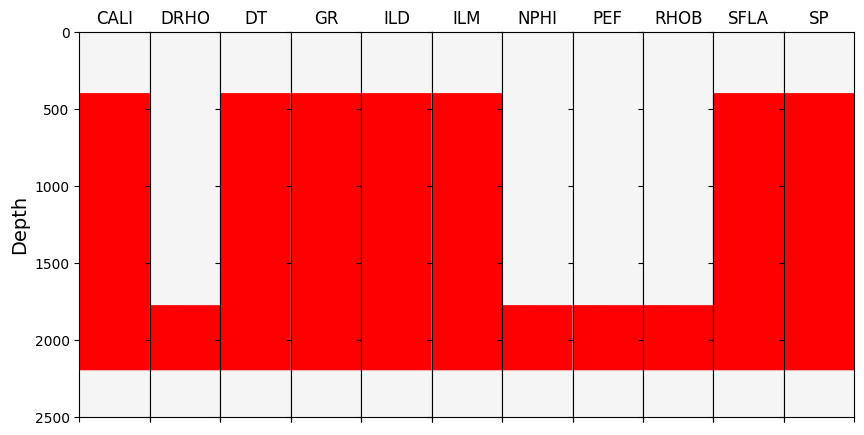

In [26]:
fig = plt.subplots(figsize=(10,5))

ax1 = plt.subplot2grid((1,11), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,11), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,11), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,11), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,11), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,11), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,11), (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,11), (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,11), (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,11), (0,9), rowspan=1, colspan = 1)
ax11 = plt.subplot2grid((1,11), (0,10), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(2500, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)
    ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

/tmp/ipykernel_183927/3530254647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)


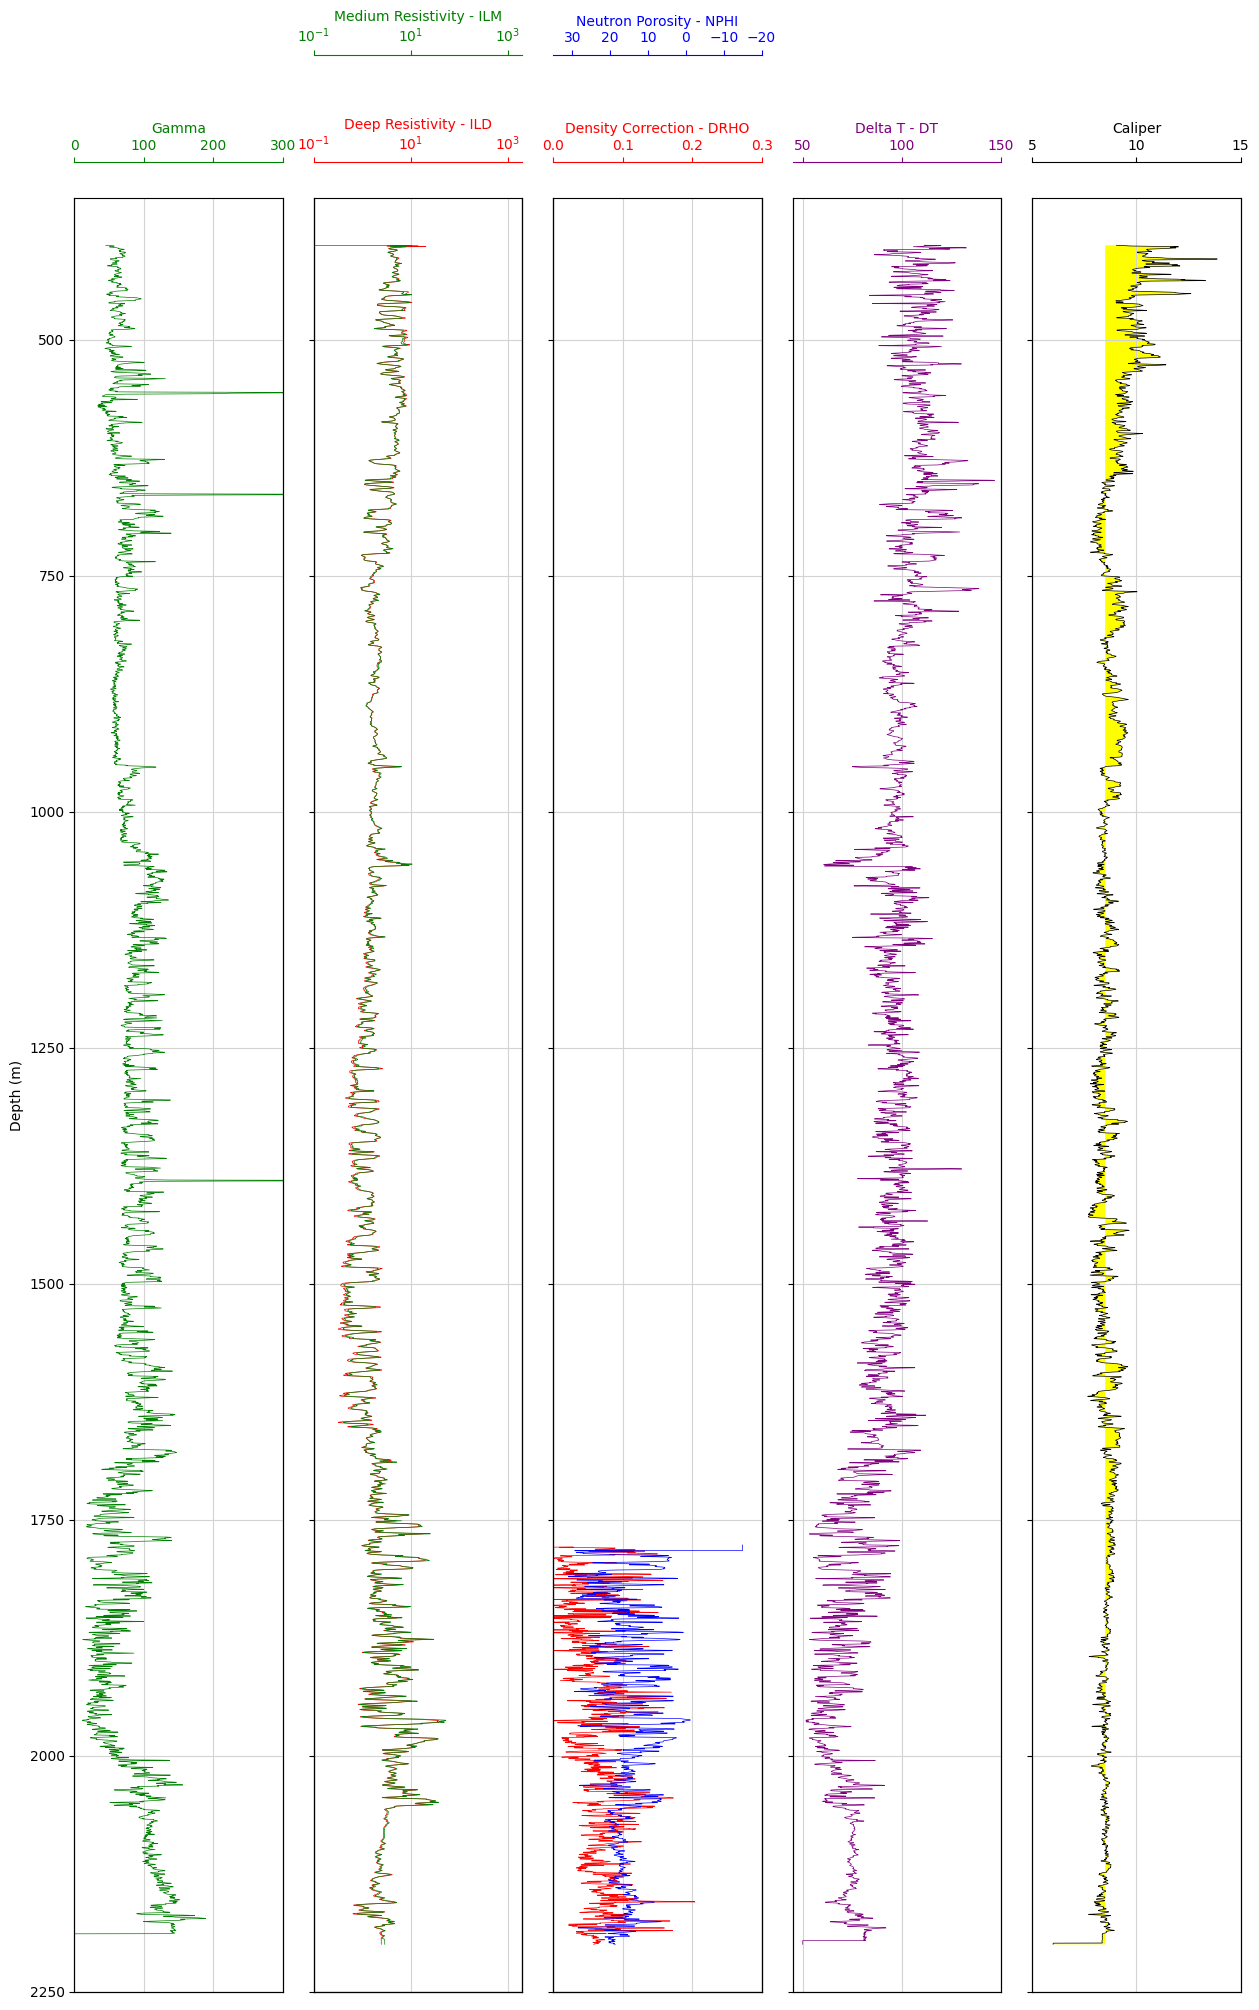

In [27]:
fig, ax = plt.subplots(figsize=(15,20))

ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() 
ax6 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()

ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 300)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 100, 200, 300])

# Deep Resistivity - ILD
ax2.plot(well["ILD"], well.index, color = "red", linewidth = 0.5)
ax2.set_xlabel("Deep Resistivity - ILD")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Medium Resistivity - ILM
ax7.plot(well["ILM"], well.index, color = "green", linewidth = 0.5)
ax7.set_xlabel("Medium Resistivity - ILM")
ax7.set_xlim(0.2, 2000)
ax7.xaxis.label.set_color("green")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="green")
ax7.spines["top"].set_edgecolor("green")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()

# Density Correction - DRHO
ax3.plot(well["DRHO"], well.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density Correction - DRHO")
ax3.set_xlim(0.0, 0.3)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.0, 0.1, 0.2, 0.3])

# Neutron Porosity - NPHI
ax5.plot(well["NPHI"], well.index, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron Porosity - NPHI')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(35, -20)
#ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([30, 20, 10, 0, -10, -20])

# Delta T - DT
ax4.plot(well["DT"], well.index, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Delta T - DT")
ax4.set_xlim(45, 150)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Caliper track
ax6.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(5, 15)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.fill_betweenx(well_nan.index, 8.5, well["CALI"], facecolor='yellow')
ax6.set_xticks([5, 10, 15])

for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.set_ylim(2250, 350 )
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

for ax in [ax2, ax3, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)
plt.show()

In [28]:
df

,DEPT,CALI,DRHO,DT,GR,ILD,ILM,NPHI,PEF,RHOB,SFLA,SP,date,distance_diff,dates_sec
11811,400.0000,9.04,NaN,111.28,45.12,14.10,0.10,NaN,NaN,NaN,0.10,40.94,2023-01-01,0.000,2023-01-02 00:00:00
11810,400.1524,9.25,NaN,117.94,48.46,11.94,0.10,NaN,NaN,NaN,2.78,28.06,2022-12-30 00:00:00,0.152,2023-01-03 00:00:00
11809,400.3048,9.37,NaN,119.72,50.59,10.28,0.10,NaN,NaN,NaN,0.25,20.90,2022-12-30 00:00:00,0.152,2023-01-04 00:00:00
11808,400.4572,9.56,NaN,118.41,54.67,5.16,10.70,NaN,NaN,NaN,1.18,8.56,2022-12-30 00:00:00,0.152,2023-01-05 00:00:00
11807,400.6096,9.61,NaN,116.07,56.10,3.87,6.18,NaN,NaN,NaN,2.26,4.30,2022-12-30 00:00:00,0.152,2023-01-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2199.3867,6.00,0.063,50.00,0.00,2.47,2.91,19.030,2.781,2.494,2.16,-0.75,2022-12-30 00:00:00,0.152,2055-05-01 00:00:00
3,2199.5391,6.00,0.059,50.00,0.00,2.47,2.91,19.127,2.808,2.490,2.16,-0.85,2022-12-30 00:00:00,0.152,2055-05-02 00:00:00
2,2199.6914,6.00,0.059,50.00,0.00,2.47,2.91,19.092,2.824,2.490,2.16,-0.92,2022-12-30 00:00:00,0.152,2055-05-03 00:00:00
1,2199.8438,6.00,0.059,50.00,0.00,2.47,2.91,18.843,2.886,2.491,2.16,-0.99,2022-12-30 00:00:00,0.152,2055-05-04 00:00:00


In [30]:
from prophet import Prophet

In [31]:
prophet = Prophet()

### Dejo subido un ejemplo con los Gamma-Rays

In [35]:
ts = pd.DataFrame({'ds':df.dates_sec,'y':df.GR})
prophet.fit(ts)

21:20:10 - cmdstanpy - INFO - Chain [1] start processing
21:20:16 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = prophet.make_future_dataframe(periods=1)

In [48]:
forecast = prophet.predict(future)

In [49]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-02,64.576427,37.505160,95.342732
1,2023-01-03,65.024118,34.726314,95.624106
2,2023-01-04,65.439411,38.131400,97.390473
3,2023-01-05,66.013003,36.873865,97.943634
4,2023-01-06,66.503931,36.153785,94.964119


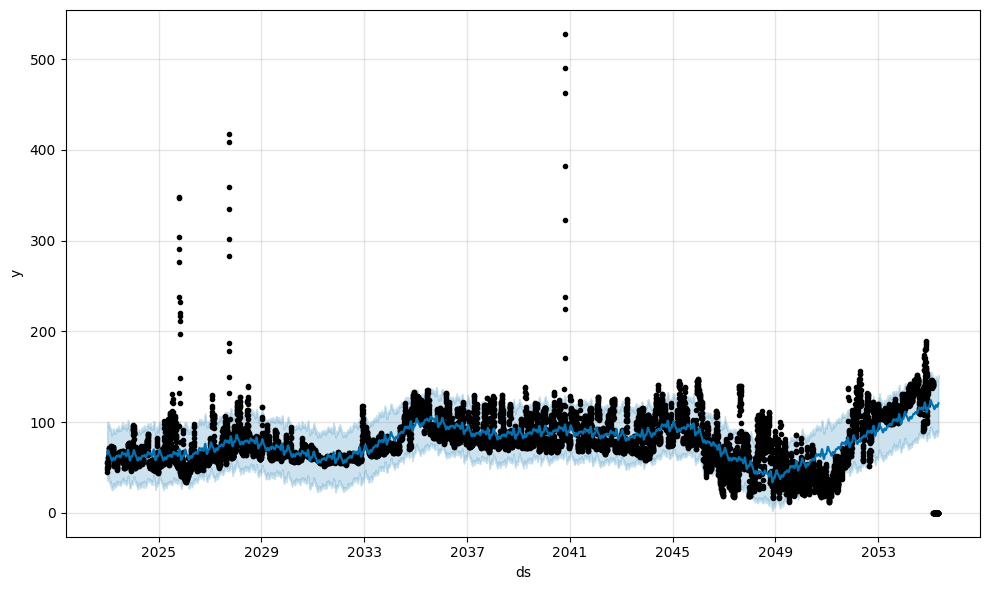

In [50]:
fig = prophet.plot(forecast)